### <span style="color:red">**IMPORTANT: Execute the cell below before proceeding:**</span> 

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation, ImageMagickWriter
import numpy as np
from math import sin, cos, pi

# Rotating squares

The goal of this notebook is to show how one can use linear transformation (and some programming) to create interesting computer animations. As an example, we will recreate [this animation](https://en.wikibooks.org/wiki/Fractals/Computer_graphic_techniques/2D/plane#/media/File:Rotating_black_and_white_squares.gif). Just for fun we will also make it more colorful. 

Below are a couple of frames taken from the animation. Each frame  consists of some number of concentric squares. At the beginning, sides of all squares are parallel to one another, but then each square rotates inside of a larger square. 

<img src="https://raw.githubusercontent.com/bbadzioch/MTH309_F2018/master/supplements/Rotating_black_and_white_squares_frame1.tiff" style="width: 200px;">

<img src="https://raw.githubusercontent.com/bbadzioch/MTH309_F2018/master/supplements/Rotating_black_and_white_squares_frame2.tiff" style="width: 200px;">


We will start by working with just two squares, a bigger black one and a smaller red one. Centers of both of squares are located at the origin of the coordinate system. The initial picture looks as follows:

<IPython.core.display.Javascript object>


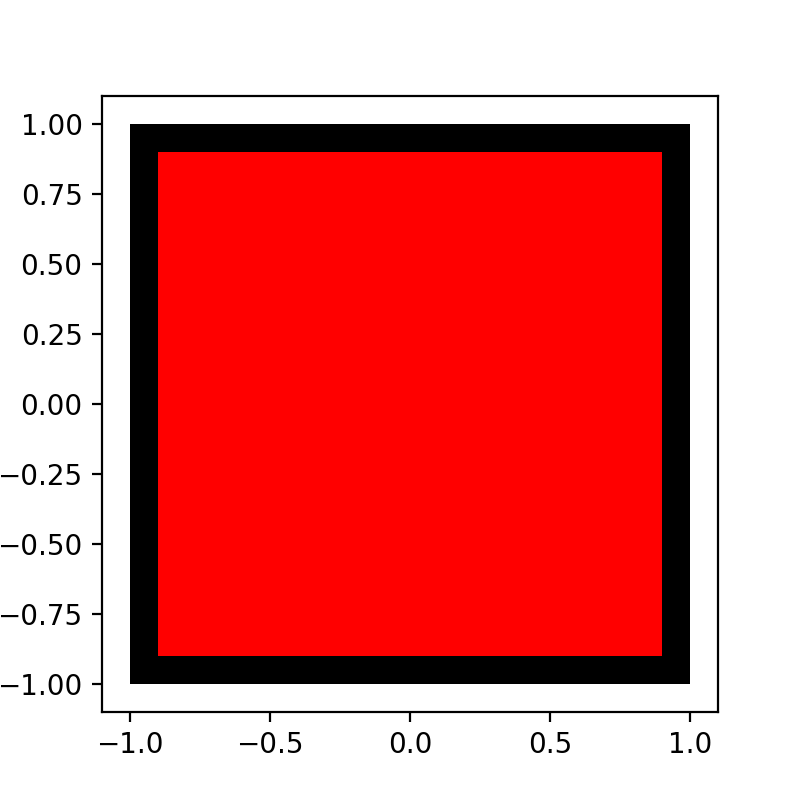

In [2]:
fig = plt.figure(figsize = (4,4))
plt.axes(aspect='equal')

#coordinates of vertices of the black square
vertices_black = np.array([[-1,-1], [1,-1], [1,1], [-1,1]]).T
#coordinates of vertices of the red square
vertices_red = np.array([[-0.9,-0.9], [0.9,-0.9], [0.9,0.9], [-0.9,0.9]]).T

#plot the black square
plt.fill(*list(vertices_black), fc = 'k')
#plot the red square
plt.fill(*list(vertices_red), 'r')

plt.show()

Next, we will rotate the red square by an angle $\theta$. This is accomplished by 
applying to this square a linear transformation represented by the following matrix:

$$
R = 
\begin{bmatrix}
\cos \theta &  \sin \theta \\
- \sin \theta & \cos \theta \\
\end{bmatrix}
$$


<IPython.core.display.Javascript object>


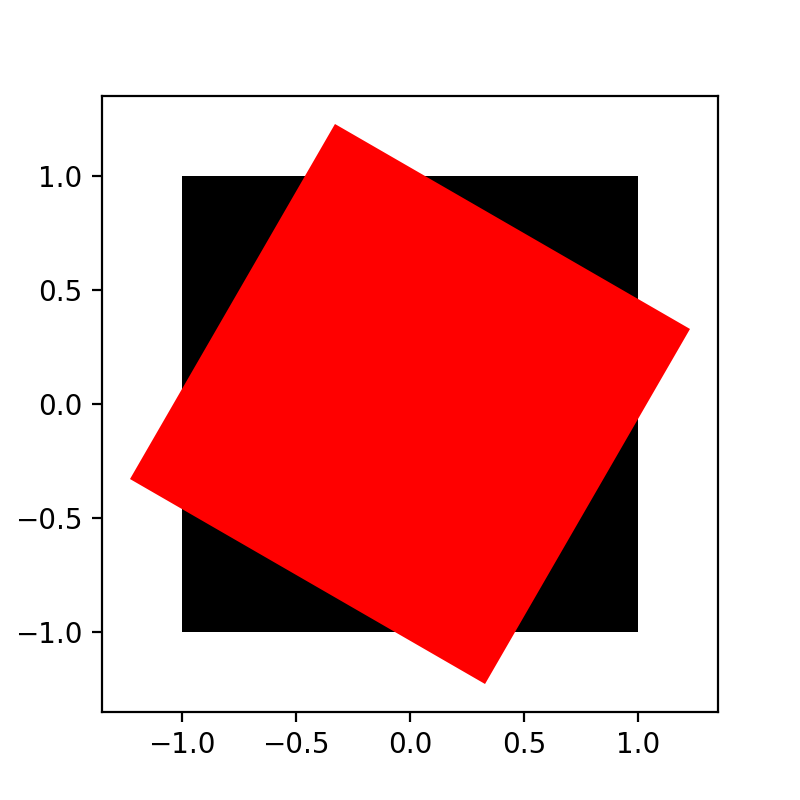

In [3]:
fig = plt.figure(figsize = (4,4))
plt.axes(aspect='equal')


#plot the black square
plt.fill(*list(vertices_black), fc = 'k')

#the rotation matrix R (for the angle theta = pi/6)
theta = pi/6
R = np.array([[cos(theta), sin(theta)], [-sin(theta), cos(theta)]])

#apply the linear transformation represented by R to vertices of the red square
rotated_red  = np.dot(R, vertices_red)

#plot the rotated red square
plt.fill(*list(rotated_red), 'r')

plt.show()

The rotated square is too large to fit inside the black square. To make it smaller we apply to it another matrix transformation given by the following matrix:

$$
S = 
\begin{bmatrix}
r &  0 \\
0  & r \\
\end{bmatrix}
$$

The number $r$ is the scaling factor. In the code below we set $r=0.7$, which makes the red square 70% of its original size.  

<IPython.core.display.Javascript object>


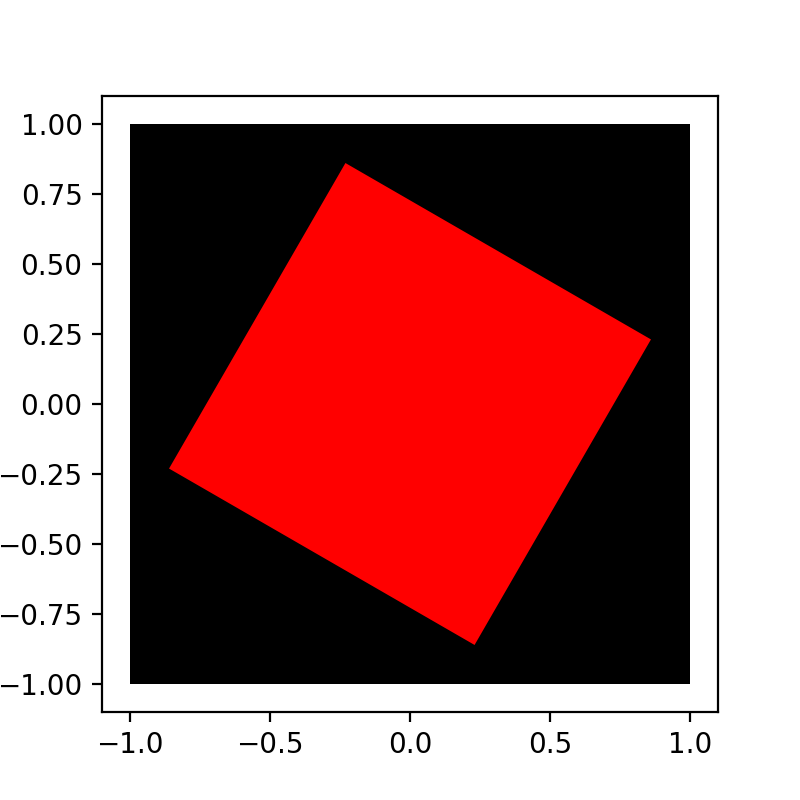

In [4]:
fig = plt.figure(figsize = (4,4))
plt.axes(aspect='equal')

#plot the black square
plt.fill(*list(vertices_black), fc = 'k')

#the scaling matrix
S = np.array([[0.7, 0], [0, 0.7]])

#apply the linear transformation represented by S to vertices of the rotated red square
scaled_red = np.dot(S, rotated_red)

#plot the red square
plt.fill(*list(scaled_red), 'r')

plt.show()

Now we have a rotated red square that fits inside the black square. This is essentially everything we need to make an animation of a rotating square. The animation will consist of some number of frames. Each frame will differ from the previous one by slightly increasing the angle of rotation and adjusting the size of the red square so that it nicely fits inside the black one. There is some more mathematics needed to figure out what should be the size of the red square depending on its angle of rotation, and some more coding required to implement it, but the main idea is to use linear transformations to rotate and scale the red square over and over again:  

<IPython.core.display.Javascript object>


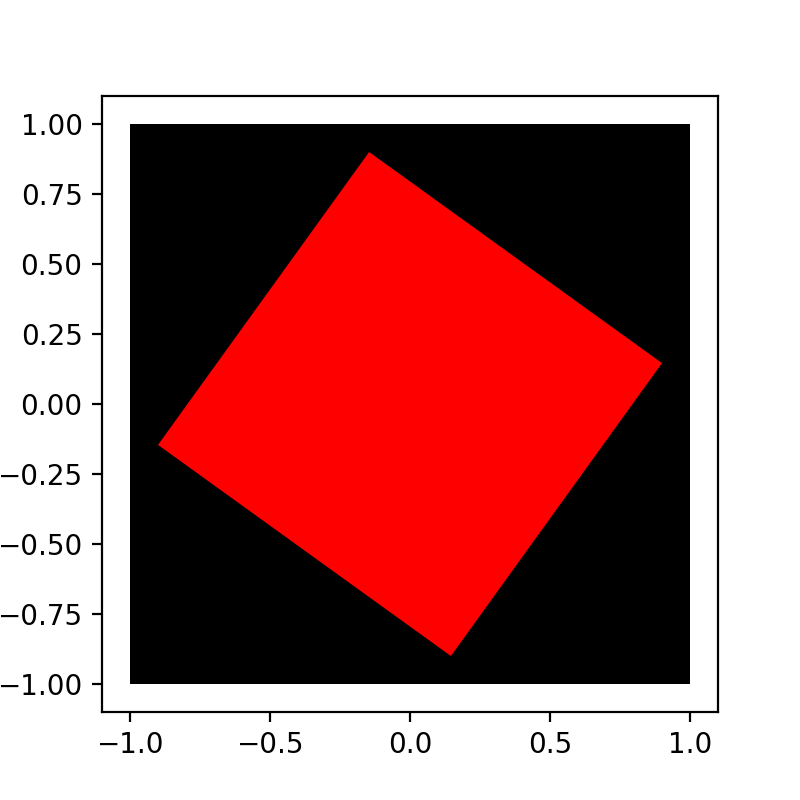

In [6]:
fig = plt.figure(figsize = (4,4))
plt.axes(aspect='equal')

vertices = np.array([[-1,-1], [1,-1], [1,1], [-1,1]]).T

#create the black and red squares
blacks, = plt.fill(*list(vertices), fc = 'k')
reds, = plt.fill(*list(0.9*vertices), fc='r')


init = reds.get_xy().copy()
theta0 = pi/2

#the function update_plot() calculates position of the red square 
#on each animation frame
def update_plot(t):
    global theta0, init
    theta = sin(t)**2*theta0
    fct = 1/(2**0.5*cos(pi/4 - ((theta)% (pi/2))))
    A = fct*np.array([[cos(theta), sin(theta)], [-sin(theta), cos(theta)]])
    temp = np.dot(A, init.T).T
    reds.set_xy(temp)
    return blacks, reds

#create the animation
ani = FuncAnimation(fig, func = update_plot, frames=np.linspace(0, pi/2, 100), interval=10, blit=True, repeat=True)

plt.show()

The final animation is obtained from the previous one by adding more squares and adjusting colors a bit to make the result look more interesting. 

<IPython.core.display.Javascript object>


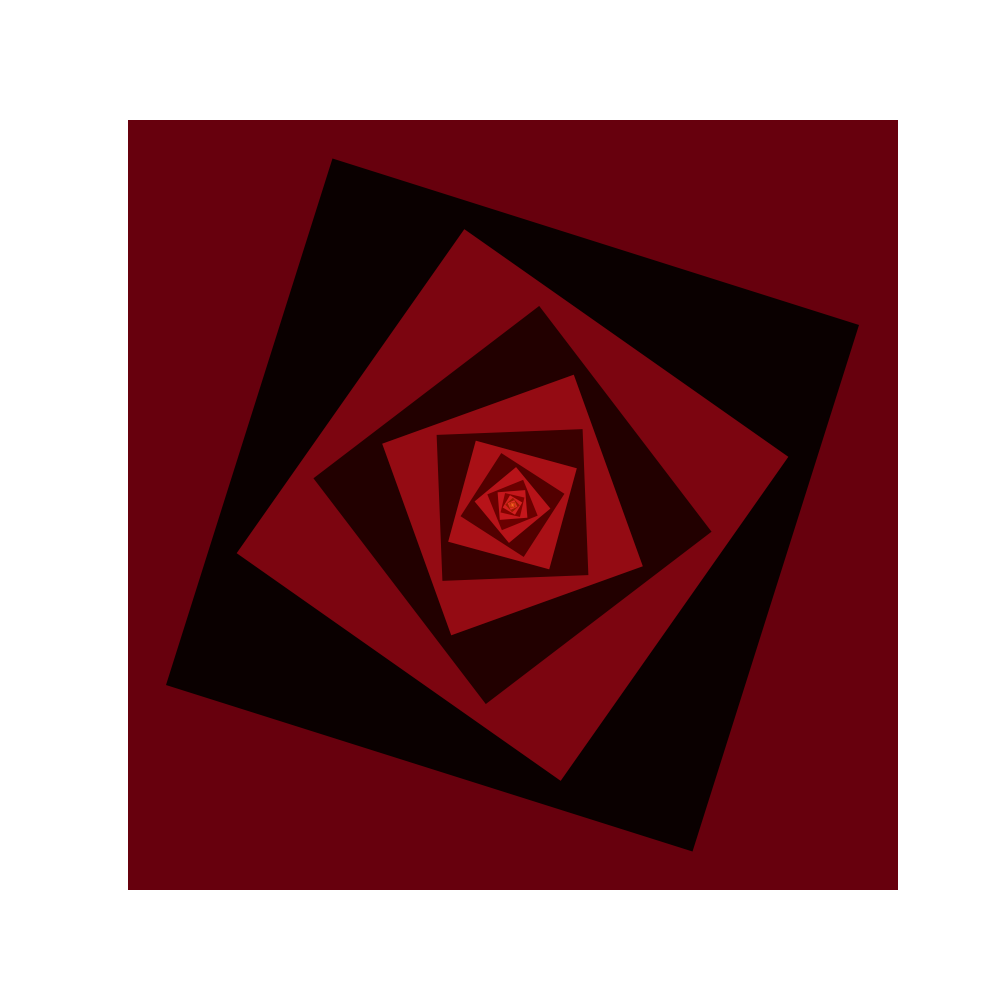

In [7]:
#overall setup of the plot
fig = plt.figure(figsize = (5,5))
ax = plt.axes(aspect='equal')
ax.set_facecolor('k')
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)

#vertices of the largest square, all other squares are scaled down from it
vertices = np.array([[-1,-1], [1,-1], [1,1], [-1,1]]).T

#scaling factor
s = 0.9
#number of squares
N = 43

theta0 = pi/2
offset = 10**(-3)

#create squares in their initial position
sq, = plt.fill(*list(vertices), fc = cm.Reds_r(0))
squares = [sq]
for i in range(1, N):
    sq, = plt.fill(*list(((s**(i-1) - offset)/s**(i-1))*s**i*vertices), 
                   fc = cm.Reds_r(i/N) if i%2 == 0 else cm.afmhot(i/N))
    squares.append(sq)

init = squares[0].get_xy().copy()

#calculate square positions for each frame of the animation
def update_plot(t):
    global theta0, squares, init, s
    
    theta = sin(t)**2*theta0
    s = 0.9
    fct = 1/(2**0.5*cos(pi/4 - ((theta)% (pi/2))))
    for i in range(0,N):
        thetai = i*theta
        A = (s*fct)**i*np.array([[cos(thetai), sin(thetai)], [-sin(thetai), cos(thetai)]])
        xy = np.dot(A, init.T).T
        squares[i].set_xy(xy)
 
    return squares

#create the animation 
ani = FuncAnimation(fig, func = update_plot, frames=np.linspace(0, pi/2, 80), interval=50, blit=True, repeat=True)

## the code below can be used to save the animation as a gif file
#writer = ImageMagickWriter(fps=15, bitrate=3600)
#ani.save('colored_squares.gif', writer=writer)

plt.show()